<a href="https://colab.research.google.com/github/vishnuvilashini2004/weather_monitoring_system/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('Iotprojectdata.csv')

DATA AUGUMENTATION

In [ ]:
df

,Entry_no,Date_of_entry,Time,Temperature,Pressure,Humidity,Rainfall_status
0,1,17-04-2023,2:15:24 PM,Temperature = 32.34 *C,Pressure = 90995.19 hPa,54.00%,No Rainfall
1,2,17-04-2023,2:15:24 PM,Temperature = 32.33 *C,Pressure = 90998.43 hPa,55.00%,No Rainfall
2,3,17-04-2023,2:19:28 PM,Temperature = 32.33 *C,Pressure = 90998.92 hPa,55.00%,No Rainfall
3,4,17-04-2023,2:19:31 PM,Temperature = 32.33 *C,Pressure = 91001.96 hPa,55.00%,No Rainfall
4,5,17-04-2023,2:19:35 PM,Temperature = 32.33 *C,Pressure = 90998.42 hPa,55.00%,No Rainfall
...,...,...,...,...,...,...,...
411,412,21-04-2023,7:26:16 PM,Temperature = 32.25 *C,Pressure = 91003.58 hPa,82.17%,No Rainfall
412,413,21-04-2023,7:26:18 PM,Temperature = 32.24 *C,Pressure = 91001.22 hPa,80.66%,No Rainfall
413,414,21-04-2023,7:26:20 PM,Temperature = 32.24 *C,Pressure = 91005.25 hPa,83.60%,No Rainfall
414,415,21-04-2023,7:26:22 PM,Temperature = 32.24 *C,Pressure = 91005.57 hPa,80.36%,No Rainfall


In [ ]:
sample_df = df.sample(frac=0.5, replace=True, random_state=1)

In [ ]:
new_df = pd.concat([df, sample_df])


In [ ]:
sample_df2 = df.sample(frac=0.3, replace=True, random_state=2)
new_df = pd.concat([new_df, sample_df2])

sample_df3 = df.sample(frac=0.2, replace=True, random_state=3)
new_df = pd.concat([new_df, sample_df3])

In [ ]:
sample_df4 = df.sample(frac=0.5, replace=True, random_state=4)
new_df = pd.concat([new_df, sample_df4])

sample_df5 = df.sample(frac=0.3, replace=True, random_state=5)
new_df = pd.concat([new_df, sample_df5])

sample_df6 = df.sample(frac=0.2, replace=True, random_state=6)
new_df = pd.concat([new_df, sample_df6])

In [ ]:
new_df.to_csv('augmented1_dataset.csv', index=False)

NEW DATASET

In [ ]:
df1 = pd.read_csv('augmented1_dataset.csv')

In [ ]:
df1

,Entry_no,Date_of_entry,Time,Temperature,Pressure,Humidity,Rainfall_status
0,1,17-04-2023,2:15:24 PM,Temperature = 32.34 *C,Pressure = 90995.19 hPa,54.00%,No Rainfall
1,2,17-04-2023,2:15:24 PM,Temperature = 32.33 *C,Pressure = 90998.43 hPa,55.00%,No Rainfall
2,3,17-04-2023,2:19:28 PM,Temperature = 32.33 *C,Pressure = 90998.92 hPa,55.00%,No Rainfall
3,4,17-04-2023,2:19:31 PM,Temperature = 32.33 *C,Pressure = 91001.96 hPa,55.00%,No Rainfall
4,5,17-04-2023,2:19:35 PM,Temperature = 32.33 *C,Pressure = 90998.42 hPa,55.00%,No Rainfall
...,...,...,...,...,...,...,...
1243,130,18-04-2023,11:45:04 AM,Temperature = 30.68 *C,Pressure = -9062.92 hPa,73.00%,No Rainfall
1244,10,17-04-2023,2:19:39 PM,Temperature = 32.32 *C,Pressure = 91001.24 hPa,49.00%,No Rainfall
1245,125,18-04-2023,11:44:54 AM,Temperature = 30.27 *C,Pressure = 91000.63 hPa,72.64%,No Rainfall
1246,102,18-04-2023,11:44:08 AM,Temperature = 30.27 *C,Pressure = 90998.14 hPa,73.00%,No Rainfall


In [ ]:
df1 = df1.drop('Entry_no', axis=1)

# Save the updated dataset
df1.to_csv('updated_dataset.csv', index=False)

In [ ]:
df1

,Date_of_entry,Time,Temperature,Pressure,Humidity,Rainfall_status
0,17-04-2023,2:15:24 PM,Temperature = 32.34 *C,Pressure = 90995.19 hPa,54.00%,No Rainfall
1,17-04-2023,2:15:24 PM,Temperature = 32.33 *C,Pressure = 90998.43 hPa,55.00%,No Rainfall
2,17-04-2023,2:19:28 PM,Temperature = 32.33 *C,Pressure = 90998.92 hPa,55.00%,No Rainfall
3,17-04-2023,2:19:31 PM,Temperature = 32.33 *C,Pressure = 91001.96 hPa,55.00%,No Rainfall
4,17-04-2023,2:19:35 PM,Temperature = 32.33 *C,Pressure = 90998.42 hPa,55.00%,No Rainfall
...,...,...,...,...,...,...
1243,18-04-2023,11:45:04 AM,Temperature = 30.68 *C,Pressure = -9062.92 hPa,73.00%,No Rainfall
1244,17-04-2023,2:19:39 PM,Temperature = 32.32 *C,Pressure = 91001.24 hPa,49.00%,No Rainfall
1245,18-04-2023,11:44:54 AM,Temperature = 30.27 *C,Pressure = 91000.63 hPa,72.64%,No Rainfall
1246,18-04-2023,11:44:08 AM,Temperature = 30.27 *C,Pressure = 90998.14 hPa,73.00%,No Rainfall


FINDING MISSING VALUES

In [ ]:
print('Missing Values:')
print(df1.isnull().sum())

Missing Values:
Date_of_entry      0
Time               0
Temperature        0
Pressure           0
Humidity           0
Rainfall_status    0
dtype: int64


Extracting only numerical values from column

In [ ]:
# extract the numerical values from Temperature column
df1['Temperature'] = df1['Temperature'].str.extract('(\d+\.?\d*)', expand=False).astype(float)

#extract the numerical values from Humidity column
df1['Humidity'] = df1['Humidity'].str.extract('(\d+\.?\d*)', expand=False).astype(float)

# extract the numerical values from Pressure column
df1['Pressure'] = df1['Pressure'].str.extract('(\d+\.?\d*)', expand=False).astype(float)

# print the updated dataframe
print(df1.head())

  Date_of_entry        Time  Temperature  Pressure  Humidity Rainfall_status
0    17-04-2023  2:15:24 PM        32.34  90995.19      54.0     No Rainfall
1    17-04-2023  2:15:24 PM        32.33  90998.43      55.0     No Rainfall
2    17-04-2023  2:19:28 PM        32.33  90998.92      55.0     No Rainfall
3    17-04-2023  2:19:31 PM        32.33  91001.96      55.0     No Rainfall
4    17-04-2023  2:19:35 PM        32.33  90998.42      55.0     No Rainfall


In [ ]:
# Convert the time column to datetime object
df1['Time'] = pd.to_datetime(df1['Time'], format='%I:%M:%S %p')

# Convert the time to 24-hour format
df1['Time'] = df1['Time'].dt.strftime('%H:%M:%S')

print(df1.head())

  Date_of_entry      Time  Temperature  Pressure  Humidity Rainfall_status
0    17-04-2023  14:15:24        32.34  90995.19      54.0     No Rainfall
1    17-04-2023  14:15:24        32.33  90998.43      55.0     No Rainfall
2    17-04-2023  14:19:28        32.33  90998.92      55.0     No Rainfall
3    17-04-2023  14:19:31        32.33  91001.96      55.0     No Rainfall
4    17-04-2023  14:19:35        32.33  90998.42      55.0     No Rainfall


Converting categorical column rainfall to numerical column

In [ ]:
df1['Rainfall_status'] = df1['Rainfall_status'].replace({'No Rainfall': 0, 'Rainfall': 1})
print(df1)

     Date_of_entry      Time  Temperature  Pressure  Humidity  Rainfall_status
0       17-04-2023  14:15:24        32.34  90995.19     54.00                0
1       17-04-2023  14:15:24        32.33  90998.43     55.00                0
2       17-04-2023  14:19:28        32.33  90998.92     55.00                0
3       17-04-2023  14:19:31        32.33  91001.96     55.00                0
4       17-04-2023  14:19:35        32.33  90998.42     55.00                0
...            ...       ...          ...       ...       ...              ...
1243    18-04-2023  11:45:04        30.68   9062.92     73.00                0
1244    17-04-2023  14:19:39        32.32  91001.24     49.00                0
1245    18-04-2023  11:44:54        30.27  91000.63     72.64                0
1246    18-04-2023  11:44:08        30.27  90998.14     73.00                0
1247    17-04-2023  14:22:43       179.88   9062.92     51.00                0

[1248 rows x 6 columns]


In [ ]:
df1.to_csv('final_dataset.csv', index=False)

In [ ]:
df1

,Date_of_entry,Time,Temperature,Pressure,Humidity,Rainfall_status
0,17-04-2023,14:15:24,32.34,90995.19,54.00,0
1,17-04-2023,14:15:24,32.33,90998.43,55.00,0
2,17-04-2023,14:19:28,32.33,90998.92,55.00,0
3,17-04-2023,14:19:31,32.33,91001.96,55.00,0
4,17-04-2023,14:19:35,32.33,90998.42,55.00,0
...,...,...,...,...,...,...
1243,18-04-2023,11:45:04,30.68,9062.92,73.00,0
1244,17-04-2023,14:19:39,32.32,91001.24,49.00,0
1245,18-04-2023,11:44:54,30.27,91000.63,72.64,0
1246,18-04-2023,11:44:08,30.27,90998.14,73.00,0


OUTLIER DETECTION AND REMOVAL

In [ ]:
def detect_outliers(df1):
    Q1 = df1.quantile(0.25)
    Q3 = df1.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = (df1 < lower_bound) | (df1 > upper_bound)
    return outliers

# Identify outliers in the whole dataset
outliers = detect_outliers(df1)

# Count the number of outliers in each column
outliers_count = outliers.sum()

# Print the number of outliers in each column
print(outliers_count)

Date_of_entry        0
Humidity             0
Pressure            58
Rainfall_status    276
Temperature         35
Time                 0
dtype: int64


<ipython-input-60-84f0870b2d44>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df1.quantile(0.25)
<ipython-input-60-84f0870b2d44>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df1.quantile(0.75)
<ipython-input-60-84f0870b2d44>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df1 < lower_bound) | (df1 > upper_bound)


In [ ]:
for col in df1.columns:
    if df1[col].dtype == 'float64' or df1[col].dtype == 'int64':
        median = df1[col].median()
        std = df1[col].std()
        lower = median - (2 * std)
        upper = median + (2 * std)
        df1.loc[(df1[col] < lower) | (df1[col] > upper), col] = median

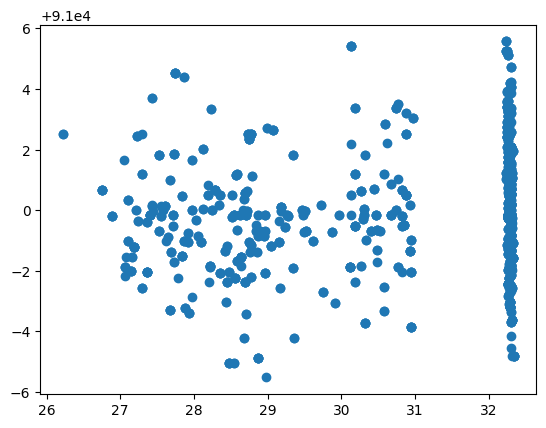

In [ ]:
plt.scatter(df1['Temperature'], df1['Pressure'])

# find outlier
outlier = df1[(df1['Temperature'] > 40) & (df1['Pressure'] > 80)]

# annotate outlier
for index, row in outlier.iterrows():
    plt.annotate(index, (row['Temperature'], row['Pressure']))

plt.show()

In [ ]:
df1

,Date_of_entry,Time,Temperature,Pressure,Humidity,Rainfall_status
0,17-04-2023,14:15:24,32.34,90995.19,54.00,0
1,17-04-2023,14:15:24,32.33,90998.43,55.00,0
2,17-04-2023,14:19:28,32.33,90998.92,55.00,0
3,17-04-2023,14:19:31,32.33,91001.96,55.00,0
4,17-04-2023,14:19:35,32.33,90998.42,55.00,0
...,...,...,...,...,...,...
1243,18-04-2023,11:45:04,30.68,90999.83,73.00,0
1244,17-04-2023,14:19:39,32.32,91001.24,49.00,0
1245,18-04-2023,11:44:54,30.27,91000.63,72.64,0
1246,18-04-2023,11:44:08,30.27,90998.14,73.00,0


In [ ]:
print(df1.columns)

Index(['Date_of_entry', 'Time', 'Temperature', 'Pressure', 'Humidity',
       'Rainfall_status'],
      dtype='object')


## Splitting as training and testing

In [ ]:
df1.drop(columns=['Date_of_entry', 'Time'], inplace=True)

In [ ]:
# Convert the 'temperature' column to a float
df1['Temperature'] = df1['Temperature'].astype(float)


In [ ]:
# Separate the target variable (y) from the features (X)
X = df1.drop('Temperature', axis=1)
y = df1['Temperature']

In [ ]:
df1

,Temperature,Pressure,Humidity,Rainfall_status
0,32.34,90995.19,54.00,0
1,32.33,90998.43,55.00,0
2,32.33,90998.92,55.00,0
3,32.33,91001.96,55.00,0
4,32.33,90998.42,55.00,0
...,...,...,...,...
1243,30.68,90999.83,73.00,0
1244,32.32,91001.24,49.00,0
1245,30.27,91000.63,72.64,0
1246,30.27,90998.14,73.00,0


# LINEAR REGRESSION

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the regression metrics for Linear Regression
linear_reg_mse = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2 = r2_score(y_test, y_pred)

print("Linear Regression")
print("Mean Squared Error: ", linear_reg_mse)
print("Mean Absolute Error: ", mae_lr)
print("Root Mean Squared Error: ", linear_reg_rmse)
print("R-squared: ", linear_reg_r2)

Linear Regression
Mean Squared Error:  2.073917653657631
Mean Absolute Error:  1.2277477130357752
Root Mean Squared Error:  1.4401102921851614
R-squared:  0.42340102431352766


## XGBOOST REGRESSION MODEL

In [ ]:
# Create an XGBoost Regression model
model = XGBRegressor()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
xgboost_mse = mean_squared_error(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)
xgboost_rmse = mean_squared_error(y_test, y_pred, squared=False)
xgboost_r2 = r2_score(y_test, y_pred)

print("XGBoost Regression Model")
print("Mean Squared Error: ", xgboost_mse)
print("Mean Absolute Error: ", mae_xgb)
print("Root Mean Squared Error: ", xgboost_rmse)
print("R-squared: ", xgboost_r2)

XGBoost Regression Model
Mean Squared Error:  0.06970830000853402
Mean Absolute Error:  0.06244980895996093
Root Mean Squared Error:  0.264023294442998
R-squared:  0.9806194164407256


## KNN MODEL

In [ ]:
# Create a KNN regression model
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training set
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the mean squared error
knn_mse = mean_squared_error(y_test, y_pred)
mae_knn = mean_absolute_error(y_test, y_pred)
knn_rmse = mean_squared_error(y_test, y_pred, squared=False)
knn_r2 = r2_score(y_test, y_pred)

print("KNN Regression Model")
print("Mean Squared Error: ", knn_mse)
print("Mean Absolute Error: ", mae_knn)
print("Root Mean Squared Error: ", knn_rmse)
print("R-squared: ", knn_r2)

KNN Regression Model
Mean Squared Error:  0.14379952
Mean Absolute Error:  0.1895040000000002
Root Mean Squared Error:  0.37920907162144735
R-squared:  0.9600202757375755


# SVR(Support Vector Regression)

In [ ]:
# create a SVR model
model = SVR(kernel='rbf')

# train the model on the training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the mean squared error and r-squared score
svr_mse = mean_squared_error(y_test, y_pred)
mae_svr = mean_absolute_error(y_test, y_pred)
svr_rmse = mean_squared_error(y_test, y_pred, squared=False)
svr_r2 = r2_score(y_test, y_pred)

# print the performance metrics
print("Support Vector Regression")
print("Mean Squared Error (MSE): ", svr_mse)
print("Mean Absolute Error (MAE): ", mae_svr)
print("Root Mean Squared Error: ", svr_rmse)
print("R-squared (R2) Score: ", svr_r2)

Support Vector Regression
Mean Squared Error (MSE):  5.876841206025927
Mean Absolute Error (MAE):  1.6394337284593286
Root Mean Squared Error:  2.424219710757655
R-squared (R2) Score:  -0.6339031656779561


## GRADIENT BOOSTING

In [ ]:
# Create the Gradient Boosting Regression model with default hyperparameters
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training set
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate performance metrics
gradient_boost_mse = mean_squared_error(y_test, y_pred)
mae_gb = mean_absolute_error(y_test, y_pred)
gradient_boost_rmse = mean_squared_error(y_test, y_pred, squared=False)
gradient_boost_r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Gradient Boosting Regression")
print("Mean Squared Error (MSE): ", gradient_boost_mse)
print("Mean Absolute Error (MAE): ", mae_gb)
print("Root Mean Squared Error (RMSE): ", gradient_boost_rmse)
print("R-squared (R2) value: ", gradient_boost_r2)

Gradient Boosting Regression
Mean Squared Error (MSE):  0.13356140176845493
Mean Absolute Error (MAE):  0.1998063326973503
Root Mean Squared Error (RMSE):  0.3654605338042056
R-squared (R2) value:  0.962866718784557


TABLE TO COMPARE THE PERFORMANCE

In [ ]:
# Create a dataframe to store the performance metrics
data = {'Model': ['Linear Regression', 'XGBoost Regression', 'SVR', 'KNN Regression', 'Gradient Boosting Regression'],
        'MSE': [linear_reg_mse, xgboost_mse, svr_mse, knn_mse, gradient_boost_mse],
        'MAE':[mae_lr,mae_xgb,mae_svr,mae_knn,mae_gb],
        'RMSE': [linear_reg_rmse, xgboost_rmse, svr_rmse, knn_rmse, gradient_boost_rmse],
        'R-Squared': [linear_reg_r2, xgboost_r2, svr_r2, knn_r2, gradient_boost_r2]}
df = pd.DataFrame(data)

# Print the dataframe
print(df)

                          Model       MSE       MAE      RMSE  R-Squared
0             Linear Regression  2.073918  1.227748  1.440110   0.423401
1            XGBoost Regression  0.069708  0.062450  0.264023   0.980619
2                           SVR  5.876841  1.639434  2.424220  -0.633903
3                KNN Regression  0.143800  0.189504  0.379209   0.960020
4  Gradient Boosting Regression  0.133561  0.199806  0.365461   0.962867


## CROSS VALIDATION

In [ ]:

from sklearn.model_selection import cross_val_score

# create X and y arrays
X = df1.drop('Temperature', axis=1)
y = df1['Temperature']

# create the XGBoost Regression model
model = XGBRegressor()

# perform cross-validation with 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# calculate the average MSE across the folds
avg_mse = -scores.mean()

# calculate the average RMSE across the folds
avg_rmse = np.sqrt(avg_mse)

# calculate the average MAE across the folds
avg_mae = -scores.mean()

# calculate the average R-squared across the folds
avg_r2 = scores.mean()

print("Average MSE: ", avg_mse)
print("Average RMSE: ", avg_rmse)
print("Average MAE: ", avg_mae)
print("Average R-squared: ", avg_r2)


Average MSE:  0.021248418444792725
Average RMSE:  0.14576837258058664
Average MAE:  0.021248418444792725
Average R-squared:  -0.021248418444792725


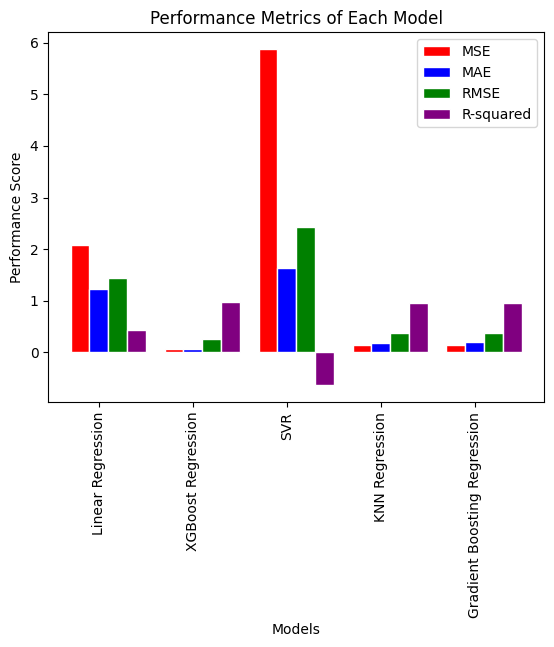

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create data
models = ['Linear Regression', 'XGBoost Regression', 'SVR', 'KNN Regression', 'Gradient Boosting Regression']
mse_scores = [2.073918, 0.069708, 5.876841, 0.143800, 0.133561]
mae_scores = [1.227748, 0.062450, 1.639434, 0.189504, 0.199806]
rmse_scores = [1.440110, 0.264023, 2.424220, 0.379209, 0.365461]
r2_scores = [0.423401, 0.980619, -0.633903, 0.960020, 0.962867]

# set width of bar
barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# plot bars
plt.bar(r1, mse_scores, color='red', width=barWidth, edgecolor='white', label='MSE')
plt.bar(r2, mae_scores, color='blue', width=barWidth, edgecolor='white', label='MAE')
plt.bar(r3, rmse_scores, color='green', width=barWidth, edgecolor='white', label='RMSE')
plt.bar(r4, r2_scores, color='purple', width=barWidth, edgecolor='white', label='R-squared')

# add xticks and labels
plt.xticks([r + barWidth for r in range(len(models))], models, rotation=90)
plt.xlabel('Models')
plt.ylabel('Performance Score')
plt.title('Performance Metrics of Each Model')
plt.legend()

# show graph
plt.show()



SAVING AS PKL FILE

In [ ]:
from sklearn.model_selection import cross_val_score

# create X and y arrays
X = df1.drop('Temperature', axis=1)
y = df1['Temperature']

# create the XGBoost Regression model
model = XGBRegressor()

# perform cross-validation with 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# save the model to disk
filename = 'xgboost_model.pkl'
joblib.dump(model, filename)

# load the model from disk
loaded_model = joblib.load(filename)

CREATING API

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# load the trained machine learning model
model = joblib.load('model.pkl')

# define an endpoint for the API
@app.route('/predict', methods=['POST'])
def predict():
    # get the input data from the HTTP request
    input_data = request.get_json()

    # preprocess the input data
    # ...

    # pass the input data through the machine learning model to generate predictions
    predictions = model.predict(input_data)

    # format the predictions as a JSON response and return it
    response = jsonify(predictions.tolist())
    return response


In [ ]:
pip install flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
